In [36]:
# import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, execute
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

from qiskit_ionq import IonQProvider 

#Call provider and set token value
# provider = IonQProvider(token='EDEq7Meo9Re0MIVV2loVBe2hZJCUG4VY')

# numpy
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt

In [39]:
def normalize_data(data):
    for d in data:
        d = d / np.linalg.norm(d)
    return data

# creates random network starting states
def initial_state(n, data):
    temp = QuantumCircuit(n)
    for i in range(n):
        index = np.random.randint(0, n)
        # people_we_consider.append(index)
        # cartesian to spherical
        theta = np.arctan(data[index][1] / data[index][0])
        phi = np.arccos(data[index][2] / np.linalg.norm(data[index]))
        temp.rx(theta, i)
        temp.ry(phi, i)
    return temp

def core_story(n_interactions):
    player = QuantumRegister(1, name='player')
    n_people = n_interactions

    network = QuantumRegister(n_people, name='network')
    bit = ClassicalRegister(1, name='bit')

    qc = QuantumCircuit(player, network, bit)  

    # get the data
    data = pd.read_csv('records.csv').to_numpy()
    data = normalize_data(data)

    # people considered in the network
    people_we_consider = []

    # gives the people in the network the random starting positions
    q2 = initial_state(n_people, data)
    q2.draw()
    qc.compose(q2, np.arange(1, n_people+1), inplace=True)

    # # debug 
    # qc.draw(output='mpl')
    # plot_bloch_multivector(qc)

    player_interactions = np.arange(1, n_people+1)
    np.random.shuffle(player_interactions)
    print(player_interactions)

    for i in (player_interactions):
        add_interaction(qc, i, data)

    # print(qc)
    qc.measure(player, bit)
    return qc
        
# negative theta is representative of sad story depending on magnitude
# positive theta is good
def life_event():
    circ = QuantumCircuit(1)
    event_types = ['rx', 'rz']
    event = np.random.choice(event_types)
    theta = (np.random.normal() % 1) * np.random.choice([-1, 1]) * np.pi/2
    if event == 'rx':
        circ.rx(theta, 0)
    elif event == 'rz':
        circ.ry(theta, 0)
    return circ

def add_interaction(qc, i, data):
    # fix gate as crx
    # gates_types = ['crx']
    theta = (np.sum(data[i]) % 1)  * np.pi
    qc.crx(theta, i, 0)
    le = life_event()
    qc.compose(le, i, inplace=True)

    # gate = [np.random.choice(gates_types) for _ in range(n_starting_people)] # list of gates as str

    # circuits = [qc.copy() for _ in range(n_starting_people)]

    # for i, circ in enumerate(circuits):
    #     theta = (np.sum(data[people_we_consider[i]]) % 1)  * np.pi
    #     if gate[i] == 'crx':
    #         circ.crx(theta, network[i], player)
    #     elif gate[i] == 'cry':
    #         circ.cry(theta, network[i], player)
    #     else:
    #         circ.crz(theta, network[i], player)
        
    #     circ.measure(player, bit)
    #     # plt.figure()
    #     # circ.draw()
    #     print(circ)
        
    # return circuits

# def check_status():
#     # run the circuit
#     better_circuit = circ[0]
#     max_ = -1

#     index_of_person_who_in_circuit = 0

#     for i, circ in enumerate(circuits):
#         backend = BasicAer.get_backend('qasm_simulator')
#         job = execute(circ, backend)
#         result = job.result()
#         counts = result.get_counts()

#         try:
#             if counts['1'] > max_:
#                 max_ = counts['1']
#                 better_circuit = circ
#                 index_of_person_who_in_circuit = i
#         except:
#             pass
        
#         print(counts)

#     print(better_circuit)

#     # remove the person who is in the circuit from our data
#     data = np.delete(data, people_we_consider[index_of_person_who_in_circuit], axis=0)
#     people_we_consider = np.delete(people_we_consider, people_we_consider[index_of_person_who_in_circuit], axis=0)

#     return better_circuit

[10 12  5  9  8  2 13  1  4  3 11  7 14  6]
{'1': 513, '0': 511}


/opt/homebrew/anaconda3/envs/iqh/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


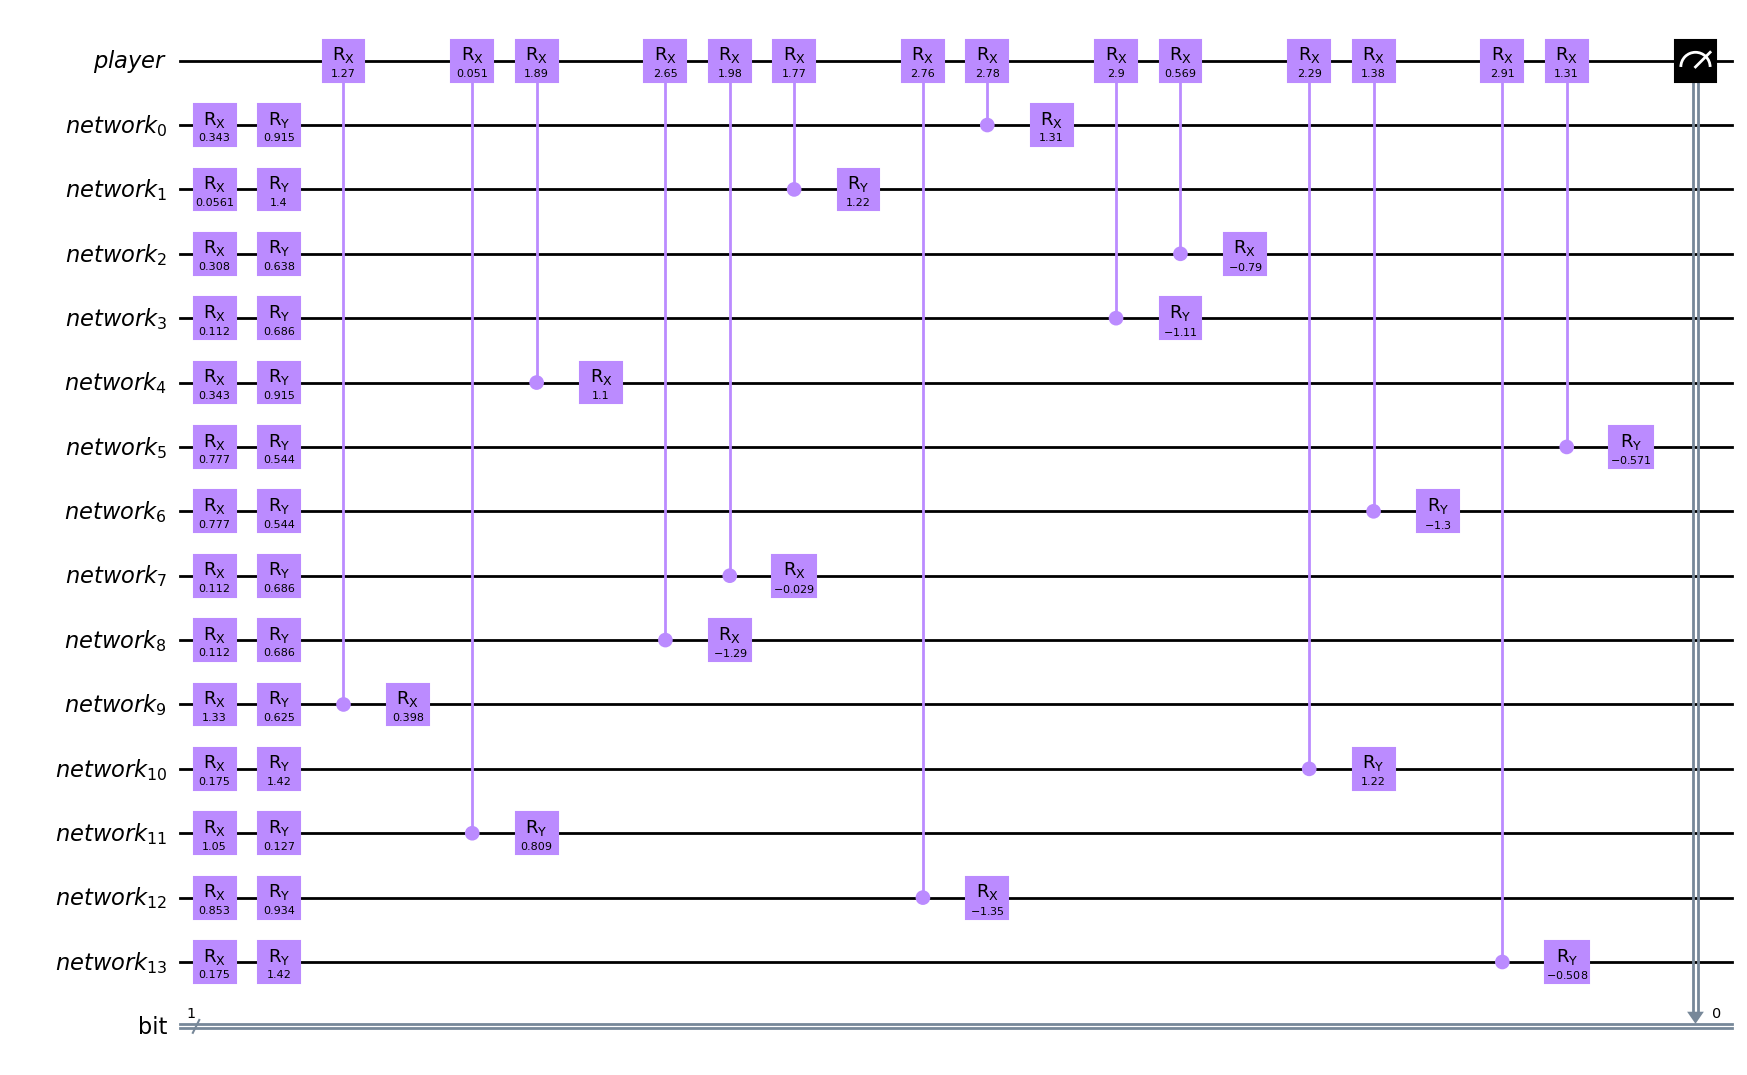

In [46]:
qc = core_story(14)
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl')

In [ ]:
# run the circuit
better_circuit = circ[0]
max_ = -1

index_of_person_who_in_circuit = 0

for i, circ in enumerate(circuits):
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(circ, backend)
    result = job.result()
    counts = result.get_counts()

    try:
        if counts['1'] > max_:
            max_ = counts['1']
            better_circuit = circ
            index_of_person_who_in_circuit = i
    except:
        pass
    
    print(counts)

print(better_circuit)

# remove the person who is in the circuit from our data
data = np.delete(data, people_we_consider[index_of_person_who_in_circuit], axis=0)

{'1': 216, '0': 808}
{'0': 1024}
                                         ┌────────────┐┌─┐
   player: ──────────────────────────────┤ Rx(2.9108) ├┤M├
           ┌─────────────┐ ┌────────────┐└─────┬──────┘└╥┘
network_0: ┤ Rx(0.46044) ├─┤ Ry(0.8409) ├──────■────────╫─
           ├─────────────┴┐├────────────┤               ║ 
network_1: ┤ Rx(0.056137) ├┤ Ry(1.4026) ├───────────────╫─
           └──────────────┘└────────────┘               ║ 
    bit: 1/═════════════════════════════════════════════╩═
                                                        0 


In [ ]:
np.random.normal()%1

0.07655120252953096

In [ ]:
# adding new people to the network
